In [2]:
'''
Final_df_regression.csv - The target column for this dataset is the CAQI_idx column. There is no CAQI_level column.
Final_df_classification.csv - The target column for this dataset is the CAQI_level column. There is no CAQI_idx column.
data of 2021 used to test

'''
import fastparquet
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mean_squared_error, r2_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier



df = pd.read_parquet('train_temporal_classification.parquet.gz')
# print(df.columns.to_list())
'''
columns that have text data -> methods used to convert to numericals
powiat              ->One-Hot Encoding
voivodship         -> LabelEncoder
holiday_name       -> LabelEncoder
season             -> One-Hot Encoding
CAQI_level(target_value) -> label encoding
'''
df_textdata = pd.DataFrame(data=df[['holiday_name','season','CAQI_level']],columns=['holiday_name','season','CAQI_level'])
df_textdata[['powiat','voivodship']] = df['powiat_voivod'].str.split(',', expand=True)
# print(df_textdata.head())

# Apply Label Encoding to the voivodship name column
le = LabelEncoder()
df_textdata['voivodship_le'] = le.fit_transform(df_textdata['voivodship'])
df_textdata['CAQI_level_le'] = le.fit_transform(df_textdata['CAQI_level'])

# Apply One-Hot Encoding to the powiat,season name column
# powiat = pd.get_dummies(df_textdata['powiat'])
season = pd.get_dummies(df_textdata['season'])

# Concatenate the encoded columns with the original dataframe
# df_textdata = pd.concat([df_textdata, powiat], axis=1)
df_textdata = pd.concat([df_textdata, season], axis=1)

# Remove the original non-encoded columns
# df_textdata.drop(['voivodship', 'powiat'], axis=1, inplace=True)

df_textdata.drop(['holiday_name','season','CAQI_level','powiat','voivodship'],axis='columns',inplace=True)
df.drop(['powiat_voivod','voivodship','CAQI_level','season','holiday_name'],axis='columns',inplace=True)
df_final = pd.concat([df, df_textdata], axis=1)

##
df_test = pd.read_parquet('train_temporal_classification.parquet.gz')

'''
columns that have text data -> methods used to convert to numericals
powiat              ->One-Hot Encoding
voivodship         -> LabelEncoder
holiday_name       -> LabelEncoder
season             -> One-Hot Encoding
CAQI_level(target_value) -> label encoding
'''
df_test_textdata = pd.DataFrame(data=df_test[['holiday_name','season','CAQI_level']],columns=['holiday_name','season','CAQI_level'])
df_test_textdata[['powiat','voivodship']] = df_test['powiat_voivod'].str.split(',', expand=True)
# print(df_test_textdata.head())

# Apply Label Encoding to the voivodship name column
le = LabelEncoder()
df_test_textdata['voivodship_le'] = le.fit_transform(df_test_textdata['voivodship'])
df_test_textdata['CAQI_level_le'] = le.fit_transform(df_test_textdata['CAQI_level'])

# Apply One-Hot Encoding to the powiat,season name column
# powiat = pd.get_dummies(df_test_textdata['powiat'])
season = pd.get_dummies(df_test_textdata['season'])

# Concatenate the encoded columns with the original dataframe
# df_test_textdata = pd.concat([df_test_textdata, powiat], axis=1)
df_test_textdata = pd.concat([df_test_textdata, season], axis=1)

# Remove the original non-encoded columns
# df_test_textdata.drop(['voivodship', 'powiat'], axis=1, inplace=True)

df_test_textdata.drop(['holiday_name','season','CAQI_level','powiat','voivodship'],axis='columns',inplace=True)
df_test.drop(['powiat_voivod','voivodship','CAQI_level','season','holiday_name'],axis='columns',inplace=True)
df_test_final = pd.concat([df_test, df_test_textdata], axis=1)

x_train = df_final.drop('CAQI_level_le',axis='columns')
y_train = df_final['CAQI_level_le']
x_test = df_test_final.drop('CAQI_level_le',axis='columns')
y_test = df_test_final['CAQI_level_le']
print('Completed')

Completed


In [32]:
#comment and uncomment the models belows and re-run the scores below
# model = DecisionTreeClassifier()
# model = RandomForestClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [33]:
f1 = f1_score(y_test,y_pred,average='macro')
f1

0.9999959576622943

In [34]:
f1 = f1_score(y_test,y_pred,average='micro')
f1

0.9999966772993089

In [35]:
f1 = f1_score(y_test,y_pred,average='weighted')
f1

0.9999966772788362

In [36]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9999966772993089

In [37]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average = 'micro')

precision

0.9999966772993089

In [38]:
precision = precision_score(y_test, y_pred, average = 'macro')

precision

0.99999842225255

In [39]:
precision = precision_score(y_test, y_pred, average = 'weighted')

precision

0.9999966773255207

In [40]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred, average ='micro')

recall

0.9999966772993089

In [41]:
recall = recall_score(y_test, y_pred, average ='macro')

recall

0.9999934931841103

In [42]:
recall = recall_score(y_test, y_pred, average ='weighted')

recall

0.9999966772993089

In [43]:
from sklearn.metrics import roc_auc_score

auc_roc = roc_auc_score(y_test, y_pred,multi_class='ovr')

auc_roc

AxisError: axis 1 is out of bounds for array of dimension 1

In [44]:
from sklearn.metrics import confusion_matrix


# calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred)

print('Confusion Matrix:')
confusion


Confusion Matrix:


array([[  8026,      0,      0,      0,      0],
       [     0, 126762,      0,      0,      0],
       [     0,      1,  30736,      0,      0],
       [     0,      0,      0,    880,      0],
       [     0,      0,      0,      0, 134555]], dtype=int64)

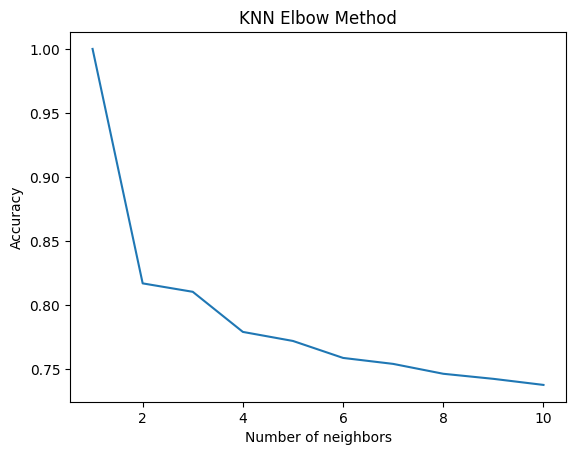

In [45]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


# Train a KNN model using a range of n_neighbors values
k_values = range(1, 11)
performance = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    performance.append(knn.score(x_test, y_test))

# Plot the performance as a function of n_neighbors
plt.plot(k_values, performance)
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Elbow Method')
plt.show()


<h4 color='Blue'>From the above diagram we can conclude that best value for n_neighbors is 2</h4>

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris



# Create a KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=2)

# Fit the model to the training data
knn.fit(x_train, y_train)

# Predict on the test data
y_pred = knn.predict(x_test)

# Calculate the accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.817085326953748


In [47]:

# Create a KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=4)

# Fit the model to the training data
knn.fit(x_train, y_train)

# Predict on the test data
y_pred = knn.predict(x_test)

# Calculate the accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7792165071770335
